# <font color='red'> Description du projet </font>

## <font color='blue'>Présentation du problème </font>

L’objectif de ce projet est d’estimer **les temps de réponse et de mobilisation** de la Brigade des Pompiers de Londres. La brigade des pompiers de Londres est le service d'incendie et de sauvetage le plus actif du Royaume-Uni  et l'une des plus grandes organisations de lutte contre l'incendie et de sauvetage au monde.

Le premier jeu de données fourni contient les détails de chaque incident traité depuis janvier 2009. Des informations sont fournies sur la date et le lieu de l'incident ainsi que sur le type d'incident traité. Il est composé de deux fichiers

*   LFB Incident data from 2009 - 2017.xlsx
*   LFB Incident data from 2018 onwards.csv

Le second fichier peut-être récupéré à l'aide du lien : 'https://data.london.gov.uk/download/london-fire-brigade-incident-records/f5066d66-c7a3-415f-9629-026fbda61822/LFB%20Incident%20data%20from%202018%20onwards.csv.xlsx' pour avoir la dernière version du fichier. En effet, les données sont mises à jour tous les mois. Il faut compter au moins 7 minutes pour la lecture des données.

<br>

Le second jeu de données contient les détails de chaque camion de pompiers envoyé sur les lieux d'un incident depuis janvier 2009. Des informations sont fournies sur l'appareil mobilisé, son lieu de déploiement et les heures d'arrivée sur les lieux de l'incident. Il est composé de trois fichiers

*   LFB Mobilisation data from January 2009 - 2014.xlsx
*   LFB Mobilisation data from 2015 - 2020.xlsx
*   LFB Mobilisation data from January 2009 - 2014.xlsx

Le dernier fichier peut-être récupéré à l'aide du lien : 'https://data.london.gov.uk/download/london-fire-brigade-mobilisation-records/3ff29fb5-3935-41b2-89f1-38571059237e/LFB%20Mobilisation%20data%202021%20-%202024.xlsx' pour avoir la dernière version du fichier (mise à jour mensuelle). Il faut compter environ 17 minutes pour la lecture des données.

## <font color='blue'> Etapes précédentes </font>



*   1 - Exploration des données : premières analyses, concaténation des différents fichiers puis jointure des 2 types de données (incident / mobilisation)
*   2 - Data visualisation.ipynb : visualisation des données, étude de la variable à prédire (temps de réponse total) en fonction des variables explicatives, création d'un jeu de données pour la modélisation
*   3 - Preprocessing1 avec ACM : création des jeux de données pour la modélisation faite dans ce notebook



## <font color='blue'>Etapes dans ce notebook </font>

Ce notebook correspond à une étape de notre modélisation où nous avions des informations incomplètes sur la définition de la variable `DetailedIncidentGroup`. Nous avons aussi eu des informations complémentaires sur l'organisation de la *London Fire Brigade* concernant les casernes, ce qui nous amené à revoir nos variables explicatives tardivement.

Nous avons choisi de présenter ce notebook car il montre un premier travail de modélisation et nous avons repris la méthodologie ensuite.

Dans ce notebook, nous avons modélisé la variable continue `TotalResponseTime_BC`. Nous avons testé des modèles linéaires (avec pénalisation ou non) et des modèles de classification.

Ce notebook est très peu commenté car cette modélisation a été abandonnée.

# <font color='red'>1) Préparation de l'environement de travail </font>

## <font color='blue'>Installation des modules </font>

In [ ]:
#!pip install matplotlib
#!pip install Seaborn
#!pip install openpyxl
#!pip install scipy
#!pip install geopandas
#!pip install scikit-learn
#!pip install statsmodels
#!pip install folium
#!pip install plotly
#!pip install --upgrade seaborn
#!pip install jupyter
#!pip install nbformat

## <font color='blue'>Importation des bibliothèques </font>

In [ ]:
import pandas as pd  #Pour les dataframe
import numpy as np #Pour le calcul numérique
import datetime as dt # Pour le calcul sur les dates

## Libraries pour les graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D # graphique 3D
import plotly.express as px  #graphique 3D dynamique
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as offline

## Libraries pour statistiques
# régression linéaire
import statsmodels.api as sm
from statsmodels.formula.api import ols
# tests statistiques
from scipy.stats import shapiro , kstest # tests de sur la normalité de la distributin
from scipy.stats import bartlett # tests sur les variances
from scipy.stats import kruskal #  comparaison des médianes
from scipy.stats import spearmanr
from scipy import stats # notamment pour boxplot
# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, max_error

# Libraries divers
from copy import deepcopy  # gestion des copies

# Pour la séparation du jeu de données
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## <font color='blue'>Liaison avec le drive (pour travailler sur GoogleColab) </font>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# <font color='red'>2) Récupération des données (cf Exploration de données)</font>


Chargement des données depuis GoogleColab

In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/1_Rendu/FinalDatasets/Reduit2/Train_Dataset.csv', low_memory=False)
validation_df = pd.read_csv('/content/gdrive/My Drive/1_Rendu/FinalDatasets/Reduit2/Validation_Dataset.csv', low_memory=False)

Chargement des données depuis un emplacement en local

In [ ]:
train_df = pd.read_csv('../Data/Datapreprocessing/Complete/Train_Dataset.csv', low_memory=False)
validation_df = pd.read_csv('../Data/Datapreprocessing/Complete/Validation_Dataset.csv', low_memory=False)

# <font color='red'> 3) Modèles linéaires
 </font>







## <font color='blue'>3.a) Méthodes </font>

Dans la suite de cette section, nous utilisons les méthodes définies ici

In [ ]:
### evaluation du modèle
# cette méthode calcul les différentes métriques permettant l'évaluation du modèle
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    max_err = max_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{model_name}")
    print(f"MSE (Validation): {mse:.4f}")
    print(f"RMSE (Validation): {rmse:.4f}")
    print(f"MAE (Validation): {mae:.4f}")
    print(f"MedAE (Validation): {medae:.4f}")
    print(f"Max Error (Validation): {max_err:.4f}")
    print(f"R² (Validation): {r2:.4f}")


In [ ]:
### graphique pred vs obs
def plot_results(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, label='Prédictions')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label='Référence')
    plt.title(f"Résultats: {model_name}")
    plt.xlabel("Valeurs Réelles")
    plt.ylabel("Prédictions")
    plt.legend()
    plt.show()


In [ ]:
### graphique residuals
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.axvline(0, color='red', linestyle='--', label='Moyenne des résidus')
    plt.title("Distribution des Résidus")
    plt.xlabel("Résidus")
    plt.ylabel("Fréquence")
    plt.legend()
    plt.show()

In [ ]:
### estimation des paramètres, prédiction et calcul des métriques d'évaluation
def train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val):
    y_train = y_train.to_numpy().ravel() if isinstance(y_train, pd.DataFrame) else y_train
    y_val = y_val.to_numpy().ravel() if isinstance(y_val, pd.DataFrame) else y_val
    # Entraînement du modèle
    model.fit(X_train, y_train)

    # Prédiction sur l'ensemble de validation
    y_pred_val = model.predict(X_val)

    # Évaluation sur l'ensemble de validation
    evaluate_model(y_val, y_pred_val, model_name)

    return y_pred_val

## <font color='blue'>3.b) Régression linéaire </font>

In [ ]:
# X_train : variable explicative du modele --> on supprime IncidentNumber et les 2 variables à prédire (ResponseTimeCategory et TotalResponseTime_BC
# on teste des modèles de regression, la variable à prédire est donc TotalResponseTime_BC
X_train = train_df.drop(columns=['IncidentNumber','ResponseTimeCategory', 'TotalResponseTime_BC'])
y_train = train_df[['TotalResponseTime_BC']]

X_val = validation_df.drop(columns=['IncidentNumber','ResponseTimeCategory', 'TotalResponseTime_BC'])
y_val = validation_df[['TotalResponseTime_BC']]


In [ ]:
# Créer une instance du modèle de régression linéaire
lr = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
lr.fit(X_train, y_train)
y_pred_LR = lr.predict(X_val)

# Calculer les métriques d'évaluation
evaluate_model(y_val, y_pred_LR, "LinearRegression")



LinearRegression
MSE (Validation): 19.4697
RMSE (Validation): 4.4124
MAE (Validation): 2.9800
MedAE (Validation): 2.1134
Max Error (Validation): 74.5766
R² (Validation): 0.4010


In [ ]:
cross_val_score(lr,X_train,y_train, cv=5).mean()

0.39628861971325235

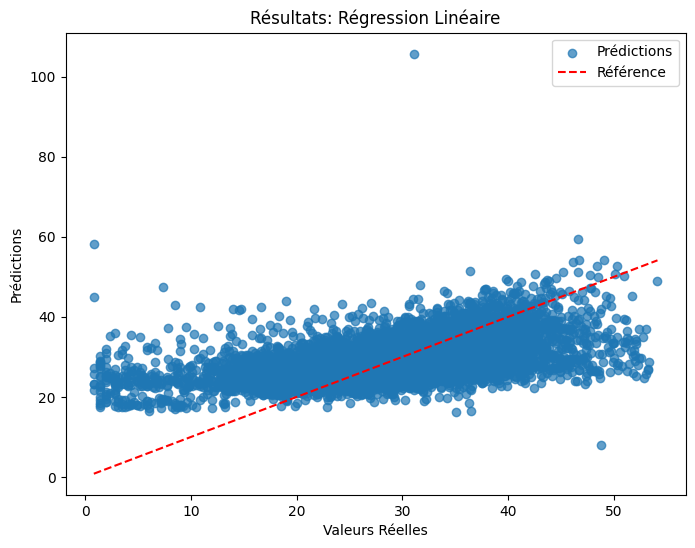

In [ ]:
plot_results(y_val, y_pred_val_LR, "Régression Linéaire")

## <font color='blue'>3.a) Régression linéaire avec pénalités </font>

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
y_pred_ridge = train_and_evaluate_model(ridge_model, "Régression Ridge", X_train, y_train, X_val, y_val)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
y_pred_lasso = train_and_evaluate_model(lasso_model, "Régression Lasso", X_train, y_train, X_val, y_val)

# ElasticNet Regression
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
y_pred_elasticnet = train_and_evaluate_model(elasticnet_model, "Régression ElasticNet", X_train, y_train, X_val, y_val)


Régression Ridge
MSE (Validation): 19.4695
RMSE (Validation): 4.4124
MAE (Validation): 2.9803
MedAE (Validation): 2.1132
Max Error (Validation): 74.5036
R² (Validation): 0.4011

Régression Lasso
MSE (Validation): 19.9404
RMSE (Validation): 4.4655
MAE (Validation): 3.0302
MedAE (Validation): 2.1549
Max Error (Validation): 69.5289
R² (Validation): 0.3866

Régression ElasticNet
MSE (Validation): 26.9811
RMSE (Validation): 5.1943
MAE (Validation): 3.7003
MedAE (Validation): 2.7288
Max Error (Validation): 38.5051
R² (Validation): 0.1700


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy.stats import loguniform
# Définir les hyperparamètres pour RandomizedSearchCV
param_distributions = {
    'alpha': loguniform(0.001, 100)  # Échelle logarithmique pour une exploration efficace
}

# Configuration de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=Ridge(),
    param_distributions=param_distributions,
    n_iter=50,  # Nombre d'itérations pour la recherche aléatoire
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Validation croisée à 5 folds
    scoring='neg_mean_squared_error',  # Critère d'évaluation
    random_state=42,  # Pour reproductibilité
    n_jobs=-1  # Utilisation de tous les cœurs disponibles
)

# Lancer la recherche des meilleurs hyperparamètres
random_search.fit(X_train, y_train)  # Utilisez ravel() si y_train est une colonne 2D

# Meilleurs hyperparamètres trouvés
best_ridge = random_search.best_estimator_
best_params = random_search.best_params_
print(f"Meilleur modèle Ridge: {best_params}")

# Évaluer le meilleur modèle sur les données de validation
y_pred_best_ridge = best_ridge.predict(X_val)

# Afficher les métriques d'évaluation
evaluate_model(y_val, y_pred_best_ridge, "Ridge Regression Optimisée")


Meilleur modèle Ridge: {'alpha': 2.0540519425388455}

Ridge Regression Optimisée
MSE (Validation): 19.4693
RMSE (Validation): 4.4124
MAE (Validation): 2.9806
MedAE (Validation): 2.1132
Max Error (Validation): 74.4239
R² (Validation): 0.4011


In [ ]:
from scipy.stats import uniform
from sklearn.linear_model import ElasticNet, LassoCV
# Distributions des hyperparamètres pour ElasticNet
param_distributions_elasticnet = {
    'alpha': np.logspace(-3, 2, 100),  # Grille logarithmique pour alpha
    'l1_ratio': uniform(0.1, 0.9)  # Distribution uniforme entre 0.1 et 1
}

# ElasticNet
elasticnet = ElasticNet(max_iter=10000)

# RandomizedSearchCV pour ElasticNet
random_search_elasticnet = RandomizedSearchCV(
    estimator=elasticnet,
    param_distributions=param_distributions_elasticnet,
    n_iter=10,  # Nombre d'échantillons aléatoires
    scoring='neg_mean_squared_error',
    cv=5,  # Validation croisée
    verbose=1,
    random_state=42
)

# LassoCV ajuste automatiquement l'alpha
lasso = LassoCV(cv=5, max_iter=10000)

# Ajuster les modèles sur les données d'entraînement
random_search_elasticnet.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Affichage des résultats
print("Meilleurs paramètres ElasticNet :", random_search_elasticnet.best_params_)
print("Meilleur alpha LassoCV :", lasso.alpha_)

# Évaluer les modèles sur le jeu de validation
y_pred_elasticnet = random_search_elasticnet.predict(X_val)
y_pred_lasso = lasso.predict(X_val)

# Assurez-vous que y_val est un vecteur unidimensionnel
y_val = np.ravel(y_val)
evaluate_model(y_val, y_pred_elasticnet, "ElasticNet")
evaluate_model(y_val, y_pred_lasso, "LassoCV")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1659: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Meilleurs paramètres ElasticNet : {'alpha': 0.0011233240329780276, 'l1_ratio': 0.7497988950401423}
Meilleur alpha LassoCV : 0.002805618519167651

ElasticNet
MSE (Validation): 19.5460
RMSE (Validation): 4.4211
MAE (Validation): 2.9981
MedAE (Validation): 2.1244
Max Error (Validation): 70.6946
R² (Validation): 0.3987

LassoCV
MSE (Validation): 19.5876
RMSE (Validation): 4.4258
MAE (Validation): 2.9937
MedAE (Validation): 2.1146
Max Error (Validation): 72.9997
R² (Validation): 0.3974


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model_name = "DecisionTreeRegressor"
# Entraîner et évaluer le modèle
y_pred_DTR= train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
del model, model_name


DecisionTreeRegressor
MSE (Validation): 32.2252
RMSE (Validation): 5.6767
MAE (Validation): 3.9110
MedAE (Validation): 2.7198
Max Error (Validation): 48.2737
R² (Validation): 0.0086


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
model_name = "Random Forest Regressor"
# Entraîner et évaluer le modèle
y_pred_RFR=train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
del model, model_name




Random Forest Regressor
MSE (Validation): 17.9491
RMSE (Validation): 4.2366
MAE (Validation): 2.8843
MedAE (Validation): 2.0538
Max Error (Validation): 39.3825
R² (Validation): 0.4478


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_name = "XGBoost Regressor"
# Utilisation de la fonction train_and_evaluate_model
y_pred_XGR = train_and_evaluate_model(model, model_name, X_train, y_train, X_val, y_val)
del model, model_name


XGBoost Regressor
MSE (Validation): 17.5454
RMSE (Validation): 4.1887
MAE (Validation): 2.8350
MedAE (Validation): 2.0100
Max Error (Validation): 38.2334
R² (Validation): 0.4602


In [ ]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_name = "LGMM Regressor"
y_pred_LGBMRegessor = train_and_evaluate_model(model, "LightGBM Regressor", X_train, y_train, X_val, y_val)
del model, model_name

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028293 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 139989, number of used features: 169
[LightGBM] [Info] Start training from score 27.906368

LightGBM Regressor
MSE (Validation): 17.3903
RMSE (Validation): 4.1702
MAE (Validation): 2.8188
MedAE (Validation): 1.9955
Max Error (Validation): 39.4322
R² (Validation): 0.4650


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Définition des hyperparamètres à explorer
rf_param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Modèle de base
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_distributions,
    n_iter=50,  # Nombre d'échantillons aléatoires
    scoring='neg_mean_squared_error',  # Optimise MSE
    cv=3,  # Validation croisée à 3 splits
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utilise tous les cœurs disponibles
)

# Ajustement du RandomizedSearchCV sur les données d'entraînement
rf_random_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Best parameters for Random Forest:", rf_random_search.best_params_)

# Évaluation avec les meilleurs hyperparamètres
best_rf_model = rf_random_search.best_estimator_
y_pred_BestRFR= train_and_evaluate_model(best_rf_model, "Optimized Random Forest Regressor", X_train, y_train, X_val, y_val)
del model, model_name


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Définition des hyperparamètres pour la recherche
rf_param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Modèle de base
rf_model = RandomForestRegressor(random_state=42)

# RandomizedSearchCV pour optimiser les hyperparamètres
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_distributions,
    n_iter=20,  # Limitez à 20 itérations pour gagner du temps
    scoring='neg_mean_squared_error',
    cv=3,  # Validation croisée à 3 plis
    verbose=1,
    random_state=42,
    n_jobs=-1  # Utilisation de tous les cœurs disponibles
)

# Ajustement sur un sous-échantillon pour accélérer
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=0.5, random_state=42)
rf_random_search.fit(X_train_sub, y_train_sub)

# Meilleurs hyperparamètres
print("Best parameters for Random Forest:", rf_random_search.best_params_)

# Modèle optimisé
best_rf_model = rf_random_search.best_estimator_

# Évaluation avec le modèle optimisé
y_pred_BestRFR = train_and_evaluate_model(best_rf_model, "Optimized Random Forest Regressor", X_train, y_train, X_val, y_val)

# Affichage des résultats finaux
print("\nÉvaluation terminée avec les meilleurs paramètres.")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}

Optimized Random Forest Regressor
MSE (Validation): 17.9407
RMSE (Validation): 4.2357
MAE (Validation): 2.8834
MedAE (Validation): 2.0556
Max Error (Validation): 39.1391
R² (Validation): 0.4481

Évaluation terminée avec les meilleurs paramètres.


In [ ]:
X_train = train_df.drop(columns=['IncidentNumber','ResponseTimeCategory', 'TotalResponseTime_BC'])
y_train = train_df[['ResponseTimeCategory']]

X_val = validation_df.drop(columns=['IncidentNumber','ResponseTimeCategory', 'TotalResponseTime_BC'])
y_val = validation_df[['ResponseTimeCategory']]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
param_distributions = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=36,  # Égale au nombre total de combinaisons
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)

# Utilisez le meilleur modèle trouvé
best_model = random_search.best_estimator_
y_pred_BestDTC=train_and_evaluate_model(best_model, "Optimized Decision Tree Classifier", X_train, y_train, X_val, y_val)

Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}

Optimized Decision Tree Classifier
MSE (Validation): 5.8458
RMSE (Validation): 2.4178
MAE (Validation): 1.7233
MedAE (Validation): 1.0000
Max Error (Validation): 11.0000
R² (Validation): 0.3721


array([9, 2, 6, ..., 3, 9, 4])

# <font color='red'> 4) Modèles classifications
 </font>


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Exemple de modèle k-NN avec k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
y_pred_KNC=train_and_evaluate_model(knn_model, "k-Nearest Neighbors", X_train, y_train, X_val, y_val)


k-Nearest Neighbors
MSE (Validation): 9.1269
RMSE (Validation): 3.0211
MAE (Validation): 2.2146
MedAE (Validation): 2.0000
Max Error (Validation): 11.0000
R² (Validation): 0.0197


In [ ]:
from sklearn.linear_model import LogisticRegression

# Exemple de modèle de régression logistique
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
y_pred_LRC=train_and_evaluate_model(log_reg_model, "Logistic Regression", X_train, y_train, X_val, y_val)


Logistic Regression
MSE (Validation): 5.9583
RMSE (Validation): 2.4410
MAE (Validation): 1.7533
MedAE (Validation): 1.0000
Max Error (Validation): 11.0000
R² (Validation): 0.3600


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Exemple de modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
y_pred_RFC= train_and_evaluate_model(rf_model, "Random Forest", X_train, y_train, X_val, y_val)


Random Forest
MSE (Validation): 6.4254
RMSE (Validation): 2.5348
MAE (Validation): 1.8947
MedAE (Validation): 2.0000
Max Error (Validation): 11.0000
R² (Validation): 0.3098


In [ ]:
from sklearn.svm import SVC

# Exemple de modèle SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
y_pred_SVC=train_and_evaluate_model(svm_model, "Support Vector Machine", X_train, y_train, X_val, y_val)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Exemple de modèle Gradient Boosting
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
y_pred_GBC= train_and_evaluate_model(gbm_model, "Gradient Boosting", X_train, y_train, X_val, y_val)


Gradient Boosting
MSE (Validation): 5.8590
RMSE (Validation): 2.4205
MAE (Validation): 1.7076
MedAE (Validation): 1.0000
Max Error (Validation): 11.0000
R² (Validation): 0.3707


In [ ]:
from xgboost import XGBClassifier

# Exemple de modèle XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False)
y_pred_XGBC= train_and_evaluate_model(xgb_model, "XGBoost", X_train, y_train, X_val, y_val)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[14:09:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost
MSE (Validation): 5.8599
RMSE (Validation): 2.4207
MAE (Validation): 1.7081
MedAE (Validation): 1.0000
Max Error (Validation): 11.0000
R² (Validation): 0.3706


In [ ]:
from lightgbm import LGBMClassifier

# Exemple de modèle LightGBM
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
y_pred_LGBMC= train_and_evaluate_model(lgbm_model, "LightGBM", X_train, y_train, X_val, y_val)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 139989, number of used features: 169
[LightGBM] [Info] Start training from score -3.006859
[LightGBM] [Info] Start training from score -3.033059
[LightGBM] [Info] Start training from score -2.594388
[LightGBM] [Info] Start training from score -2.317475
[LightGBM] [Info] Start training from score -2.182694
[LightGBM] [Info] Start training from score -2.146663
[LightGBM] [Info] Start training from score -2.228858
[LightGBM] [Info] Start training from score -2.383484
[LightGBM] [Info] Start training from score -2.616728
[LightGBM] [Info] Start training from score -2.317403
[LightGBM] [Info] Start tr

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

def find_best_params_and_predict(model, param_distributions, X_train, y_train, X_val, y_val, model_name):
    """
    Effectue une recherche des meilleurs paramètres pour un modèle donné avec RandomizedSearchCV, et retourne les prédictions.
    """
    randomized_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_distributions,
        n_iter=20,               # Nombre d'itérations de recherche aléatoire
        scoring='accuracy',      # Ajustez la métrique selon le problème (par ex. 'f1_weighted')
        cv=3,                    # Nombre de plis pour la validation croisée
        n_jobs=-1,               # Utilisation de tous les cœurs disponibles
        verbose=1,               # Affiche les logs de progression
        random_state=42          # Pour garantir la reproductibilité
    )

    # Exécute la recherche
    randomized_search.fit(X_train, y_train)

    # Meilleurs paramètres et score
    print(f"\n{model_name} - Best Parameters: {randomized_search.best_params_}")
    print(f"{model_name} - Best Cross-Validation Score: {randomized_search.best_score_:.4f}")

    # Meilleur modèle entraîné
    best_model = randomized_search.best_estimator_

    # Prédictions sur l'ensemble de validation
    y_pred = best_model.predict(X_val)

    # Évaluation
    evaluate_model(y_val, y_pred, model_name)

    return y_pred, randomized_search.best_params_


In [ ]:
import optuna
from sklearn.metrics import accuracy_score

def find_best_params_and_predict_optuna(model, X_train, y_train, X_val, y_val, model_name):
    """
    Effectue une recherche des meilleurs paramètres pour un modèle donné avec Optuna (optimisation bayésienne),
    et retourne les prédictions.
    """
    def objective(trial):
        # Définir les hyperparamètres à optimiser
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        }

        # Créer le modèle avec ces paramètres
        model.set_params(**param)

        # Entraînement
        model.fit(X_train, y_train)

        # Prédictions
        y_pred = model.predict(X_val)

        # Retourner le score de validation
        return accuracy_score(y_val, y_pred)

    # Création d'une étude pour l'optimisation
    study = optuna.create_study(direction="maximize")

    # Optimisation des hyperparamètres
    study.optimize(objective, n_trials=20)  # Nombre d'itérations pour optimiser les hyperparamètres

    # Meilleurs paramètres
    print(f"\n{model_name} - Best Parameters: {study.best_params}")
    print(f"{model_name} - Best Cross-Validation Score: {study.best_value:.4f}")

    # Utilisation du meilleur modèle
    best_params = study.best_params
    model.set_params(**best_params)

    # Entraînement final sur les meilleurs paramètres
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de validation
    y_pred = model.predict(X_val)

    # Évaluation
    evaluate_model(y_val, y_pred, model_name)

    return y_pred, study.best_params


In [ ]:
from sklearn.linear_model import LogisticRegression
param_grid_log_reg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
y_pred_log_reg, best_params_log_reg = find_best_params_and_predict(
    log_reg_model, param_grid_log_reg, X_train, y_train, X_val, y_val, "Logistic Regression"
)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning:

The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.



Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




Logistic Regression - Best Parameters: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}
Logistic Regression - Best Cross-Validation Score: 0.2212

Logistic Regression
MSE (Validation): 5.9560
RMSE (Validation): 2.4405
MAE (Validation): 1.7471
MedAE (Validation): 1.0000
Max Error (Validation): 11.0000
R² (Validation): 0.3603


In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42)
y_pred_best_rf, best_params_rf = find_best_params_and_predict(
    rf_model, param_grid_rf, X_train, y_train, X_val, y_val, "Random Forest"
)

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_model = SVC(probability=True, random_state=42)
y_pred_best_svm, best_params_svm = find_best_params_and_predict(
    svm_model, param_grid_svm, X_train, y_train, X_val, y_val, "Support Vector Machine"
)

In [ ]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBClassifier(use_label_encoder=False, random_state=42)
y_pred_nest_xgb, best_params_xgb = find_best_params_and_predict(
    xgb_model, param_grid_xgb, X_train, y_train, X_val, y_val, "XGBoost"
)

In [ ]:
param_grid_lgbm = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgbm_model = LGBMClassifier(random_state=42)
y_pred_best_lgbm, best_params_lgbm = find_best_params_and_predict(
    lgbm_model, param_grid_lgbm, X_train, y_train, X_val, y_val, "LightGBM"
)

# Nouvelle section

In [ ]:
residus_norm = (residus-residus.mean())/residus.std()